<a href="https://colab.research.google.com/github/DianaBravoPerez/EDP-1/blob/main/prueba_promedios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba de los Promedios
### Simulacion - Tarea

la prueba de los promedios sirve para verificar si los numeros pseudoaleatorios que tenemos son uniformes entre 0 y 1.

segun lo visto en clase, si los numeros son U(0,1) entonces su media deberia ser 0.5

**Hipotesis:**
- H0: µ = 0.5  (son uniformes)
- Ha: µ ≠ 0.5  (no son uniformes)

el estadistico que usamos es:

Z0 = (X_barra - 1/2) * sqrt(N) / sqrt(1/12)

y si |Z0| < Z_alpha/2 entonces no se rechaza H0

In [ ]:
# primero importo las librerias que voy a necesitar
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# aqui pongo los datos de la tabla 3.1 que viene en el archivo adjunto
# los copie a mano uno por uno

datos = [
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79982, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.88752, 0.33729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49383, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

# lo convierto a array de numpy para poder hacer operaciones
datos = np.array(datos)

print("total de datos:", len(datos))
print("como son mas de 30 si se puede aplicar la prueba")

total de datos: 100
como son mas de 30 si se puede aplicar la prueba


In [ ]:
# calculo la media muestral
# que es la suma de todos dividida entre N

N = len(datos)
X_barra = np.mean(datos)

print("N =", N)
print("media muestral (X_barra) =", X_barra)

N = 100
media muestral (X_barra) = 0.48234379999999993


In [ ]:
# ahora calculo el estadistico Z0
# la formula es: Z0 = (X_barra - 0.5) * sqrt(N) / sqrt(1/12)

# el denominador es sqrt(1/12) porque esa es la desviacion estandar de una U(0,1)
# (esto lo saque de mis apuntes de clase)

Z0 = (X_barra - 0.5) * np.sqrt(N) / np.sqrt(1/12)

print("Z0 =", Z0)

Z0 = -0.6116287093719546


In [ ]:
# el nivel de significancia lo pongo en 0.05 que es el mas comun
# el valor critico Z_alpha/2 lo saco con scipy

alpha = 0.05
Z_critico = stats.norm.ppf(1 - alpha/2)

print("alpha =", alpha)
print("Z_critico (Z_alpha/2) =", Z_critico)
print()

# comparacion
print("|Z0| =", abs(Z0))
print("Z_critico =", Z_critico)
print()

# decision
if abs(Z0) < Z_critico:
    print("como |Z0| < Z_critico entonces NO se rechaza H0")
    print("conclusion: los numeros pasan la prueba, se comportan como U(0,1)")
else:
    print("como |Z0| >= Z_critico entonces SE RECHAZA H0")
    print("conclusion: los numeros NO pasan la prueba")

alpha = 0.05
Z_critico (Z_alpha/2) = 1.959963984540054

|Z0| = 0.6116287093719546
Z_critico = 1.959963984540054

como |Z0| < Z_critico entonces NO se rechaza H0
conclusion: los numeros pasan la prueba, se comportan como U(0,1)


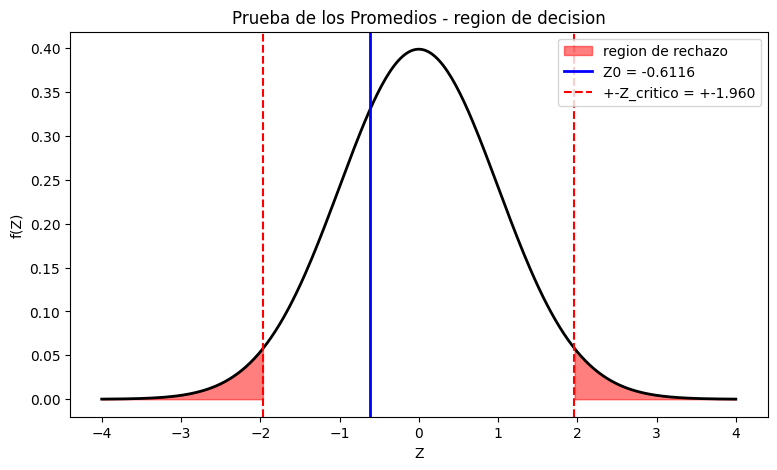

Z0 cae dentro de la region de no rechazo, entonces H0 no se rechaza


In [ ]:
# grafica de la distribucion normal con la region de rechazo
# para visualizar donde cae nuestro Z0

x = np.linspace(-4, 4, 300)
y = stats.norm.pdf(x)

plt.figure(figsize=(9, 5))
plt.plot(x, y, 'k-', linewidth=2)

# region de rechazo en rojo
x_izq = x[x <= -Z_critico]
x_der = x[x >= Z_critico]
plt.fill_between(x_izq, stats.norm.pdf(x_izq), color='red', alpha=0.5, label='region de rechazo')
plt.fill_between(x_der, stats.norm.pdf(x_der), color='red', alpha=0.5)

# donde cae Z0
plt.axvline(x=Z0, color='blue', linewidth=2, label=f'Z0 = {Z0:.4f}')
plt.axvline(x=-Z_critico, color='red', linestyle='--', linewidth=1.5, label=f'+-Z_critico = +-{Z_critico:.3f}')
plt.axvline(x=Z_critico, color='red', linestyle='--', linewidth=1.5)

plt.title('Prueba de los Promedios - region de decision')
plt.xlabel('Z')
plt.ylabel('f(Z)')
plt.legend()
plt.show()

print("Z0 cae dentro de la region de no rechazo, entonces H0 no se rechaza")